<a href="https://colab.research.google.com/github/anton-akulenko/HW02-DS/blob/main/Copy_of_HW09_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikeras

In [2]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [145]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [146]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

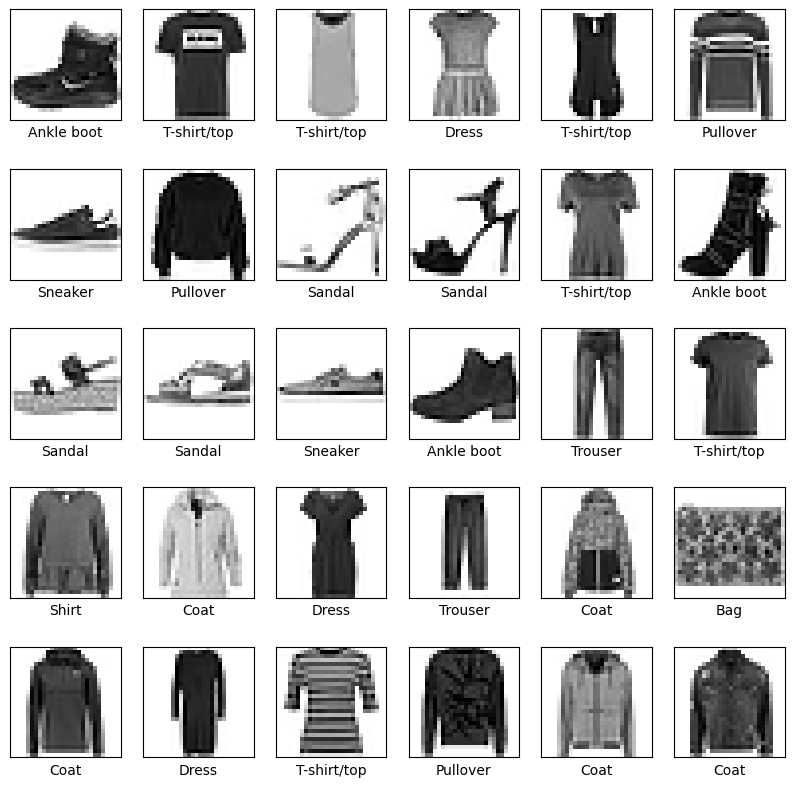

In [5]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [ ]:
x_train = x_train[:10000]
x_test = x_test[:1000]
y_train = y_train[:10000]
y_test = y_test[:1000]



```
neurons = 1024
optimizer = ['Adam']
batch_size = 512
epochs = 80
learning_rate= [0.005, 0.0005] #[0.0005]
init_mode = ['glorot_normal']
activation = ['relu']
weight_constraint = [2.50]
dropout_rate = [0.2]
metrics = ['accuracy']
```



In [158]:
num_classes = 10
num_features = 28 * 28 * 1
neurons = 512
optimizer = ['Adam']
batch_size = 512
epochs = 60
learning_rate= 0.005 #[0.0005]
init_mode =  'glorot_normal'#'uniform'
loss='categorical_crossentropy', #categorical_crossentropy
activation = 'relu'
weight_constraint = 2.50
dropout_rate = 0.2
metrics = ['accuracy'] #["f1_score"]

In [148]:

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#for special layers
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

#for Dense only
x_train = x_train.reshape(-1, num_features)
x_test = x_test.reshape(-1, num_features)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

x_train.shape, y_train.shape


((60000, 784), (60000, 10))



```
Best: 0.895617 using {'batch_size': 512, 'epochs': 60, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__init_mode': 'glorot_normal', 'model__neurons': 1024, 'model__weight_constraint': 2.5, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.005}
0.889233 (0.001333) with: {'batch_size': 512, 'epochs': 60, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 512, 'model__weight_constraint': 2.0, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.005}
0.895100 (0.001267) with: {'batch_size': 512, 'epochs': 60, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 512, 'model__weight_constraint': 2.5, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.005}```



In [159]:
model = Sequential([
    Dense(neurons, activation=activation, kernel_initializer=init_mode, input_shape=(num_features,)),
    Dropout(dropout_rate),
    Dense(neurons/2, activation=activation, kernel_initializer=init_mode),
    Dropout(dropout_rate),
    Dense(neurons/4, activation=activation, kernel_initializer=init_mode),
    Dropout(dropout_rate),
    #test with extra layer
    # Dense(neurons/8, activation=activation, kernel_initializer=init_mode, kernel_constraint=MaxNorm(weight_constraint)),
    # Dropout(dropout_rate),
    Dense(num_classes, activation='softmax', kernel_initializer=init_mode),
])
model.compile(optimizer=Adam(),#(learning_rate=learning_rate),
              loss=loss, #sparse_categorical_crossentropy
              metrics=[metrics])

**hard code HP**

In [119]:
# model = Sequential()

# model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))


# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(),
#               metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 512)               401920    
                                                                 
 dropout_57 (Dropout)        (None, 512)               0         
                                                                 
 dense_77 (Dense)            (None, 256)               131328    
                                                                 
 dropout_58 (Dropout)        (None, 256)               0         
                                                                 
 dense_78 (Dense)            (None, 128)               32896     
                                                                 
 dropout_59 (Dropout)        (None, 128)               0         
                                                                 
 dense_79 (Dense)            (None, 10)              

In [160]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/60
118/118 [==============================] - 6s 43ms/step - loss: 0.6901 - accuracy: 0.7559 - val_loss: 0.4452 - val_accuracy: 0.8404
Epoch 2/60
118/118 [==============================] - 5s 38ms/step - loss: 0.4294 - accuracy: 0.8454 - val_loss: 0.4058 - val_accuracy: 0.8583
Epoch 3/60
118/118 [==============================] - 5s 45ms/step - loss: 0.3827 - accuracy: 0.8628 - val_loss: 0.3704 - val_accuracy: 0.8667
Epoch 4/60
118/118 [==============================] - 4s 35ms/step - loss: 0.3535 - accuracy: 0.8712 - val_loss: 0.3754 - val_accuracy: 0.8660
Epoch 5/60
118/118 [==============================] - 4s 34ms/step - loss: 0.3321 - accuracy: 0.8792 - val_loss: 0.3690 - val_accuracy: 0.8647
Epoch 6/60
118/118 [==============================] - 5s 45ms/step - loss: 0.3177 - accuracy: 0.8838 - val_loss: 0.3356 - val_accuracy: 0.8811
Epoch 7/60
118/118 [==============================] - 4s 35ms/step - loss: 0.3065 - accuracy: 0.8862 - val_loss: 0.3308 - val_accuracy: 0.8833

In [161]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8995

Train accuracy: 0.9644
Test accuracy: 0.8995


In [162]:
from sklearn.metrics import classification_report

predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

report = classification_report(np.argmax(y_test, axis=1), predicted_labels, target_names=class_names)
print(report)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.85      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.84      0.79      0.81      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.82      0.82      0.82      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.71      0.77      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



1/1 [==============================] - 0s 30ms/step


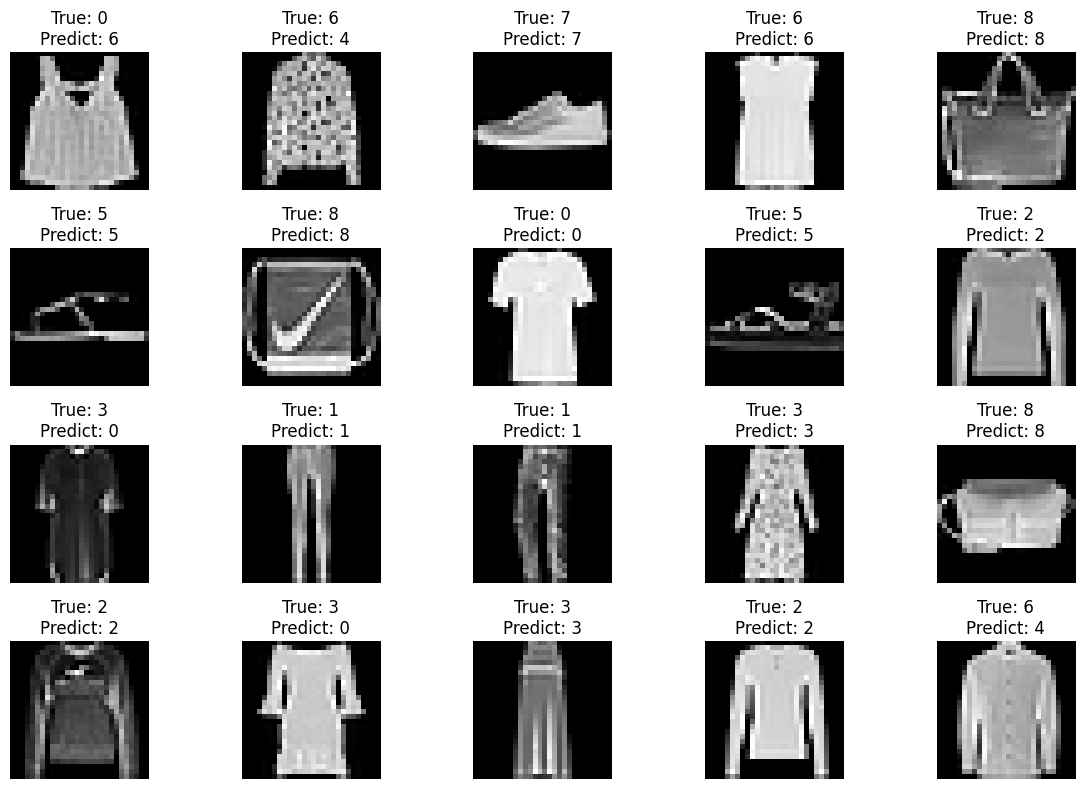

In [163]:
num_images = 20
random_indices = np.random.choice(range(len(x_test)), size=num_images, replace=False)
predictions = model.predict(x_test[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[index])}\nPredict: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

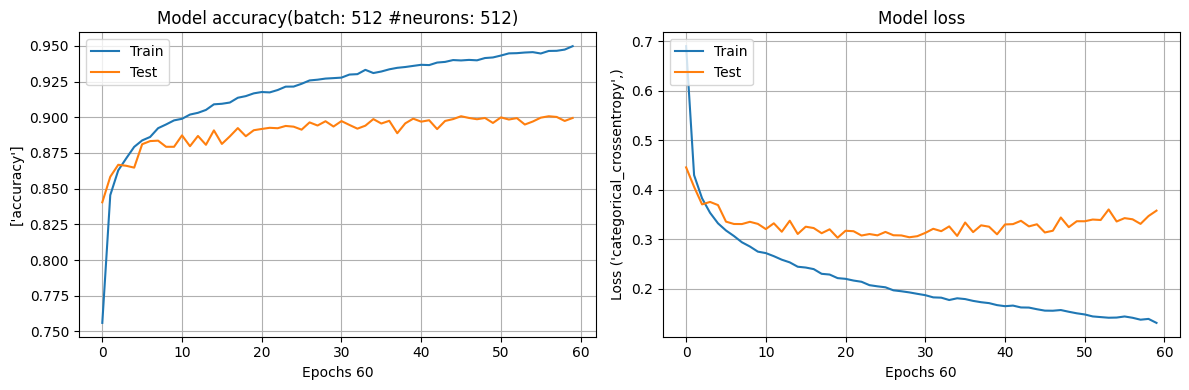

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model accuracy(batch: {batch_size} #neurons: {neurons})')
plt.ylabel(f'{metrics}')
plt.xlabel(f'Epochs {epochs}')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel(f'Loss {loss}')
plt.xlabel(f'Epochs {epochs}')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

# Grid Search hyperparameters

In [ ]:
#   model = Sequential([
#   Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
#   MaxPooling2D((2, 2)),
#   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#   MaxPooling2D((2, 2)),
#   Flatten(),
#   Dense(128, activation='relu'),
#   Dense(10, activation='softmax')
# ])

  # batch_size = [128]

  # Best: 0.869800 using {'batch_size': 64, 'epochs': 10,

In [ ]:
def create_model(neurons=50, dropout_rate=0.1, weight_constraint=3.00, init_mode='uniform', activation='relu'):
  model = Sequential([
      Dense(neurons, activation=activation, kernel_initializer=init_mode, kernel_constraint=MaxNorm(weight_constraint), input_shape=(num_features,)),
      Dropout(dropout_rate),
      Dense(neurons/2, activation=activation, kernel_initializer=init_mode, kernel_constraint=MaxNorm(weight_constraint)),
      Dropout(dropout_rate),
      Dense(neurons/4, activation=activation, kernel_initializer=init_mode, kernel_constraint=MaxNorm(weight_constraint)),
      Dropout(dropout_rate),
      #test with extra layer
      Dense(neurons/8, activation=activation, kernel_initializer=init_mode, kernel_constraint=MaxNorm(weight_constraint)),
      Dropout(dropout_rate),
      Dense(num_classes, activation='softmax', kernel_initializer=init_mode),
  ])
#   model = Sequential([
#   Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
#   MaxPooling2D((2, 2)),
#   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#   MaxPooling2D((2, 2)),
#   Flatten(),
#   Dense(128, activation='relu'),
#   Dense(10, activation='softmax')
# ])

  model.compile(optimizer=optimizers.Adam((lr=learning_rate)),
                loss='categorical_crossentropy', #sparse_categorical_crossentropy
                metrics=['accuracy'])
  return model
# fix random seed for reproducibility
# seed = 7
# tf.random.set_seed(seed)

model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
##########################################################################
neurons = [128]
optimizer = ['Adam']
batch_size = [64]
epochs = [20]
learning_rate= [0.001]
init_mode = ['glorot_normal']
activation = ['relu']
weight_constraint = [0.5, 1.5]
dropout_rate = [0.1]
metrics = ['accuracy']

#Optimal hyperparams #############################################
# neurons = [10]
# optimizer=['rmsprop']
# batch_size = [256] #10
# epochs = [5]
# learning_rate= [0.1]
# init_mode = ['glorot_normal']
# activation = ['softplus']
# weight_constraint = [3.00]
# dropout_rate = [0.1]
# loss='binary_crossentropy'
# metrics = ['f1_score']

####### Tests###########
# neurons = [10, 15, 20, 25, 30]
# optimizer = ['RMSprop', 'Adagrad','Adam']
# batch_size = [10, 50, 100, 500]
# epochs = [5, 10, 20]
# learning_rate= [0.001, 0.01, 0.1, 0.2, 0.3]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# loss='binary_crossentropy'
# metrics = ['f1_score', 'accuracy']


param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, optimizer__learning_rate=learning_rate, model__neurons=neurons,
                  model__init_mode=init_mode, model__activation=activation, metrics=metrics,
                  model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



```
Best: 0.895617 using {'batch_size': 512, 'epochs': 60, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__init_mode': 'glorot_normal', 'model__neurons': 1024, 'model__weight_constraint': 2.5, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.005}
0.889233 (0.001333) with: {'batch_size': 512, 'epochs': 60, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 512, 'model__weight_constraint': 2.0, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.005}
0.895100 (0.001267) with: {'batch_size': 512, 'epochs': 60, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 512, 'model__weight_constraint': 2.5, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.005}```





```
Best: 0.886267 using {'batch_size': 512, 'epochs': 10, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 512, 'model__weight_constraint': 1.0, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.001}```





```
Best: 0.882517 using {'batch_size': 256, 'epochs': 10, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 100, 'model__weight_constraint': 1.0, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.1}```





```
Best: 0.869900 using {'batch_size': 256, 'epochs': 10, 'metrics': 'accuracy', 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 50, 'model__weight_constraint': 1.0, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.1}```





```
Best: 0.835050 using {'batch_size': 256, 'epochs': 10, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 50, 'model__weight_constraint': 1.0, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.1}
0.831450 (0.001698) with: {'batch_size': 256, 'epochs': 10, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 50, 'model__weight_constraint': 1.0, 'optimizer': 'RMSprop', 'optimizer__learning_rate': 0.1}
0.833033 (0.003843) with: {'batch_size': 256, 'epochs': 10, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 50, 'model__weight_constraint': 1.0, 'optimizer': 'Adagrad', 'optimizer__learning_rate': 0.1}
0.835050 (0.005212) with: {'batch_size': 256, 'epochs': 10, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 50, 'model__weight_constraint': 1.0, 'optimizer': 'Adam', 'optimizer__learning_rate': 0.1}
```





```
Best: 0.873600 using {'batch_size': 256, 'epochs': 5, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.05, 'model__init_mode': 'glorot_normal', 'model__neurons': 10, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.873600 (0.002526) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.05, 'model__init_mode': 'glorot_normal', 'model__neurons': 10, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.871800 (0.004908) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 10, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.867160 (0.000174) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'accuracy', 'model__activation': 'softplus', 'model__dropout_rate': 0.2, 'model__init_mode': 'glorot_normal', 'model__neurons': 10, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}```





```
Best: 0.872440 using {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 10, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.500040 (0.000028) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 1, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.867480 (0.003072) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 5, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.872440 (0.003432) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 10, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.868000 (0.007929) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 15, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.866680 (0.004196) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 20, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.867200 (0.003213) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 25, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}
0.864840 (0.006869) with: {'batch_size': 256, 'epochs': 5, 'metrics': 'f1_score', 'model__activation': 'softplus', 'model__dropout_rate': 0.1, 'model__init_mode': 'glorot_normal', 'model__neurons': 30, 'model__weight_constraint': 3.0, 'optimizer': 'rmsprop', 'optimizer__learning_rate': 0.1}```



In [ ]:
from sklearn.metrics import classification_report
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics

model = Sequential([
    Dense(8, activation='relu', input_shape=(2000,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train,
    epochs=5,
    batch_size=128)

predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

report = classification_report(y_test, predicted_labels)
print(report)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

num_classes = 10
num_features = 1
learning_rate = 0.001
batch_size = 256
epochs = 10

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = len(x_train) // batch_size

callbacks = [lr_scheduler, early_stopping]

history = model.fit(train_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

In [ ]:
results = model.evaluate(x_test, y_test)
result = model.predict(x_test[0, :].reshape(1, 2000))
print(result)

Best: 0.884320 using {'batch_size': 512, 'epochs': 5, 'optimizer': 'rmsprop'}


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# model.compile(
#     optimizer=optimizers.rmsprop_v2.RMSprop(lr=0.001),
#     loss=losses.binary_crossentropy,
#     metrics=[metrics.accuracy]
# )
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# history = model.fit(
#     partial_x_train,
#     partial_y_train,
#     epochs=20,
#     batch_size=512,
#     validation_data=(x_val, y_val)
# )

In [ ]:
# print(history.history.keys())

In [ ]:
# import matplotlib.pyplot as plt


# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']

# epochs = range(1, len(history_dict['accuracy']) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.clf()
# val_acc_values = history_dict['val_accuracy']
# plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
# plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# results = model.evaluate(x_test, y_test)
# print(results)

In [ ]:
# result = model.predict(x_test[0, :].reshape(1, 10000))
# print(result)

In [ ]:
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=768)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/10
33/33 [==============================] - 2s 38ms/step - loss: 0.5019 - accuracy: 0.7848
Epoch 2/10
33/33 [==============================] - 1s 36ms/step - loss: 0.3065 - accuracy: 0.8937
Epoch 3/10
33/33 [==============================] - 1s 34ms/step - loss: 0.2418 - accuracy: 0.9147
Epoch 4/10
33/33 [==============================] - 2s 50ms/step - loss: 0.2050 - accuracy: 0.9269
Epoch 5/10
33/33 [==============================] - 2s 46ms/step - loss: 0.1818 - accuracy: 0.9362
Epoch 6/10
33/33 [==============================] - 1s 34ms/step - loss: 0.1610 - accuracy: 0.9429
Epoch 7/10
33/33 [==============================] - 1s 34ms/step - loss: 0.1490 - accuracy: 0.9464
Epoch 8/10
33/33 [==============================] - 1s 35ms/step - loss: 0.1361 - accuracy: 0.9520
Epoch 9/10
33/33 [==============================] - 1s 34ms/step - loss: 0.1239 - accuracy: 0.9574
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3462 - accuracy: 0.8741
[0.34615

In [ ]:
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=768)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/10
33/33 [==============================] - 2s 37ms/step - loss: 0.5374 - accuracy: 0.7830
Epoch 2/10
33/33 [==============================] - 1s 34ms/step - loss: 0.2929 - accuracy: 0.8971
Epoch 3/10
33/33 [==============================] - 1s 35ms/step - loss: 0.2104 - accuracy: 0.9271
Epoch 4/10
33/33 [==============================] - 1s 33ms/step - loss: 0.1693 - accuracy: 0.9421
Epoch 5/10
33/33 [==============================] - 1s 35ms/step - loss: 0.1406 - accuracy: 0.9528
Epoch 6/10
33/33 [==============================] - 2s 48ms/step - loss: 0.1190 - accuracy: 0.9610
Epoch 7/10
33/33 [==============================] - 2s 53ms/step - loss: 0.1021 - accuracy: 0.9680
Epoch 8/10
33/33 [==============================] - 1s 45ms/step - loss: 0.0871 - accuracy: 0.9741
Epoch 9/10
33/33 [==============================] - 2s 51ms/step - loss: 0.0746 - accuracy: 0.9791
Epoch 10/10
782/782 [==============================] - 3s 3ms/step - loss: 0.4433 - accuracy: 0.8641
[0.44326

In [ ]:
results = model.evaluate(x_test, y_test)
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

1/1 [==============================] - 0s 132ms/step
[[0.08422622]]
